# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


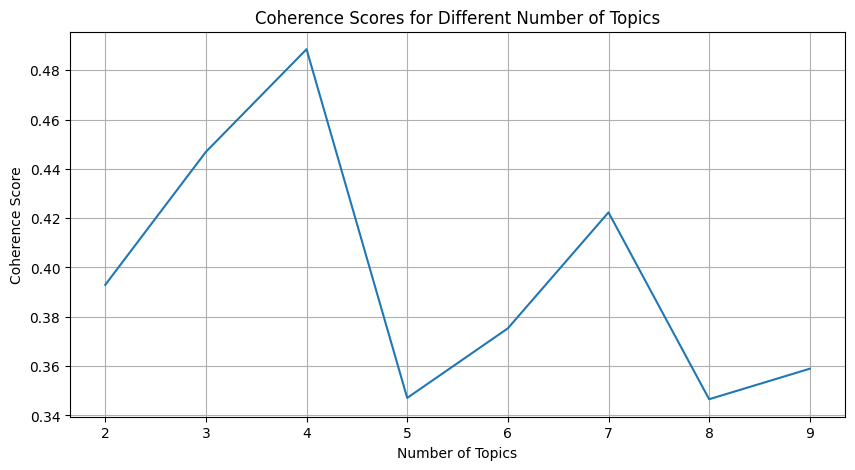

In [ ]:
!pip install datasets
import nltk
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load AG News dataset (this dataset consists of mainly four different categories : World, Sports, Business, Science/Technology)
dataset = load_dataset("ag_news", split='test')
documents = dataset['text'][:5000]  # Using first 5000 datapoints

# Set up the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stop_words.update(['from', 'subject', 're', 'edu', 'use'])

# Preprocessing the data
data = []
for doc in documents:
    # Tokenizing and removing stopwords
    tokens = [
        lemmatizer.lemmatize(word)  # Lemmatization
        for word in simple_preprocess(doc, deacc=True)  # Tokenization and removing punctuation
        if word not in stop_words and len(word) > 2  # Remove stopwords and short tokens
    ]
    data.append(tokens)


# Creating Dictionary and Corpus
id2word = corpora.Dictionary(data)
corpus = [id2word.doc2bow(text) for text in data]

# Function to compute coherence for various K values
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=10, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Running coherence evaluation for different K
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data, start=2, limit=10, step=1)

# Plotting coherence scores to find the optimal K
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Number of Topics")
plt.grid()
plt.show()


In [ ]:
'''Since the curve appears to level off after K (number of topics) = 4 and also attains the maximum coherence score at that point,
we can conclude that the dataset can be effectively categorized into 4 distinct topics using the LDA method.

It's important to note that the plot may vary with each run, and this conclusion is based on the most recent execution of the code.'''

"Since the curve appears to level off after K (number of topics) = 4 and also attains the maximum coherence score at that point, \nwe can conclude that the dataset can be effectively categorized into 4 distinct topics using the LDA method.\n\nIt's important to note that the plot may vary with each run, and this conclusion is based on the most recent execution of the code."

In [ ]:
# Selecting model with number of topics = 4
optimal_model = model_list[2]
topics = optimal_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")

Topic 1: 0.015*"reuters" + 0.011*"new" + 0.010*"said" + 0.010*"profit" + 0.009*"price" + 0.009*"oil" + 0.009*"third" + 0.009*"quarter" + 0.008*"percent" + 0.008*"stock"
Topic 2: 0.010*"first" + 0.010*"game" + 0.007*"year" + 0.007*"world" + 0.007*"win" + 0.006*"one" + 0.006*"red" + 0.006*"time" + 0.006*"sox" + 0.006*"two"
Topic 3: 0.012*"new" + 0.008*"quot" + 0.007*"microsoft" + 0.007*"service" + 0.006*"company" + 0.006*"group" + 0.006*"internet" + 0.006*"said" + 0.006*"say" + 0.005*"year"
Topic 4: 0.010*"said" + 0.009*"iraq" + 0.008*"state" + 0.007*"afp" + 0.007*"president" + 0.006*"reuters" + 0.006*"people" + 0.006*"killed" + 0.006*"two" + 0.005*"baghdad"


Once K has been determined and the top keywords for each topic have been viewed, use the keywords to determine the essence of each. Here's an illustration of how to provide a unique summary of a topic:

Social interaction includes group dynamics, connections, and conversations.
Technology advancement includes new software, tools, and innovations.
Lifestyle, diet, and physical activity all contribute to health and wellness.
Financial strategies include economic planning, budgeting, and investments.
Environmental Awareness includes Eco-friendly practices, sustainability, and conservation.

The summary of each topic should provide a clear and concise interpretation of the primary theme derived from the keywords produced.


In [ ]:
'''Based on the keywords extracted from each topic, here are concise summaries that encapsulate the essence of each:

Topic 1: Financial News
Focuses on market updates and economic performance, with key terms like "profit," "price," and "stock," highlighting financial reporting.

Topic 2: Sports Events
Centers on sports competitions, featuring terms such as "game," "win,", "world," and "year," indicating notable sports achievements.

Topic 3: Technology and Business
Revolves around tech advancements and corporate developments, with keywords like "Microsoft," "service," and "internet."

Topic 4: Political and Global Issues
Discusses political matters, particularly regarding Iraq, with terms like "president," "killed," and "Baghdad," reflecting governance and conflict.

'''

'Based on the keywords extracted from each topic, here are concise summaries that encapsulate the essence of each:\n\nTopic 1: Financial News\nFocuses on market updates and economic performance, with key terms like "profit," "price," and "stock," highlighting financial reporting.\n\nTopic 2: Sports Events\nCenters on sports competitions, featuring terms such as "game," "win,", "world," and "year," indicating notable sports achievements.\n\nTopic 3: Technology and Business\nRevolves around tech advancements and corporate developments, with keywords like "Microsoft," "service," and "internet."\n\nTopic 4: Political and Global Issues\nDiscusses political matters, particularly regarding Iraq, with terms like "president," "killed," and "Baghdad," reflecting governance and conflict.\n\n'

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

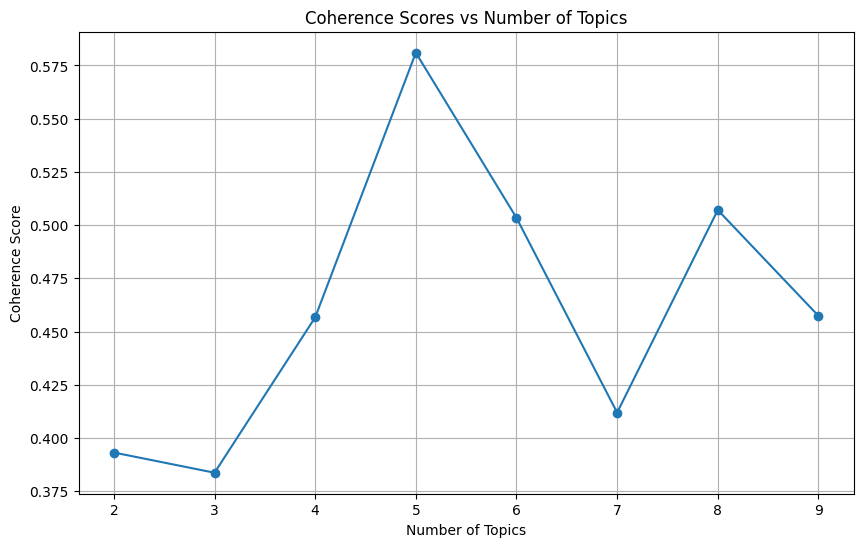

In [ ]:
# Write your code here
from gensim.models import LsiModel

# Function to compute coherence for various K values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values


model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data, start=2, limit=10, step=1)

# Plotting coherence scores versus number of topics
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), coherence_values, marker='o')
plt.title('Coherence Scores vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(range(2, 10))
plt.grid()
plt.show()

In [ ]:
'''Since the curve appears to level off after K (number of topics) = 5 and also attains the maximum coherence score at that point,
we can conclude that the dataset can be effectively categorized into 5 distinct topics using the LSA method.

It's important to note that the plot may vary with each run, and this conclusion is based on the most recent execution of the code.'''

In [ ]:
optimal_topics = 5
print(f"Optimal number of topics: {optimal_topics}")

# Creating the optimal LSA model
optimal_model = model_list[3]

# Displaying the top keywords with positive weights for each topic
topics = optimal_model.show_topics(num_topics=optimal_topics,formatted=False)
for idx, topic in topics:
    # Filter for positive weights and sort by weight in descending order
    positive_keywords = [(word, weight) for word, weight in topic if weight > -0.1]
    sorted_keywords = sorted(positive_keywords, key=lambda x: x[1], reverse=True)[:10]  # Top 10 keywords
    keywords_str = ', '.join([f"{word} ({weight:.4f})" for word, weight in sorted_keywords])
    print(f"Topic {idx + 1} Keywords (Top 10): {keywords_str}")


Optimal number of topics: 5
Topic 1 Keywords (Top 10): reuters (0.3954), new (0.3499), said (0.2985), year (0.1668), stock (0.1546), oil (0.1439), york (0.1364), price (0.1273), fullquote (0.1231), two (0.1117)
Topic 2 Keywords (Top 10): reuters (0.4127), fullquote (0.2689), stock (0.2426), investor (0.1643), http (0.1403)
Topic 3 Keywords (Top 10): new (0.6816), york (0.1880), oil (0.1580), price (0.1426), gaza (-0.0823), killed (-0.0879), two (-0.0896)
Topic 4 Keywords (Top 10): new (0.2010), com (0.1483), fullquote (0.1469), microsoft (0.1452), inc (0.1204)
Topic 5 Keywords (Top 10): reuters (0.2881), game (0.2349), win (0.1768), first (0.1626), two (0.1623), new (0.1413)


In [ ]:
'''
The optimal number of topics identified is five.

Topic 1 focuses on financial news, emphasizing market updates and economic performance with keywords like "reuters," "stock," and "price."

Topic 2 centers on investor insights, featuring terms such as "investor" and "fullquote," which highlight stock market analysis.

Topic 3 discusses current events, using keywords like "new," "york," and "gaza" to reflect geopolitical developments.

Topic 4 covers technology and business, with keywords such as "Microsoft" and "new," indicating advancements in the corporate sector.

Topic 5 revolves around sports highlights, showcasing notable achievements with terms like "game" and "win."

There is not much clear partition between the topics and their keywords.
'''

'\nThe optimal number of topics identified is five.\n\nTopic 1 focuses on financial news, emphasizing market updates and economic performance with keywords like "reuters," "stock," and "price."\n\nTopic 2 centers on investor insights, featuring terms such as "investor" and "fullquote," which highlight stock market analysis.\n\nTopic 3 discusses current events, using keywords like "new," "york," and "gaza" to reflect geopolitical developments.\n\nTopic 4 covers technology and business, with keywords such as "Microsoft" and "new," indicating advancements in the corporate sector.\n\nTopic 5 revolves around sports highlights, showcasing notable achievements with terms like "game" and "win."\n\nThere is not much clear partition between the topics and their keywords.\n'

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here
!pip install bertopic[visualization] pandas scikit-learn matplotlib
!pip install gensim
import pandas as pd
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

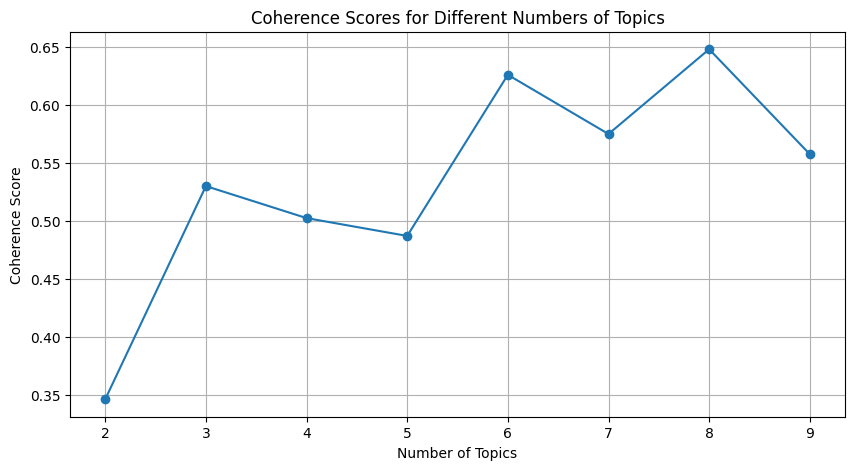

In [ ]:
# Form documents from preprocessed tokens
preprocessed_docs= [" ".join(words) for words in data]

# Evaluate Coherence Scores for different numbers of topics
coherence_scores = []
topic_range = range(2, 10)

for k in topic_range:
    topic_model = BERTopic(nr_topics=k, calculate_probabilities=True)
    topics, probs = topic_model.fit_transform(preprocessed_docs)
    topics_list = [[key for key,prob in topic_model.get_topic(topic)] for topic in topic_model.get_topics().keys() if topic != -1]

    if topics_list:  # Only compute coherence if topics_list is not empty
        coherence_model = CoherenceModel(topics=topics_list, texts=data, dictionary=id2word, coherence='c_v')
        coherence = coherence_model.get_coherence()
        coherence_scores.append(coherence)
    else:
        coherence_scores.append(0)  # Append a default value if no topics are found

# Plot Coherence Scores
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xticks(topic_range)
plt.grid()
plt.show()

In [ ]:
'''
It can be observed that at K= 6, the coherence score is almost saturated. So we could proceed with K = 6 for finding the clusters.'''

In [ ]:
optimal_K = 6

# Train the final model with optimal K
final_model = BERTopic(nr_topics=optimal_K, calculate_probabilities=True)
final_topics, probs = final_model.fit_transform(preprocessed_docs)

# Summarize the Topics
topic_info = final_model.get_topic_info()
for index, row in topic_info.iterrows():
    topic_number = row['Topic']
    topic_words = final_model.get_topic(topic_number)
    if topic_number != -1:  # Skip noise topic
        print(f"Topic {topic_number}: {', '.join([word for word, _ in topic_words])}")

Topic 0: new, oil, reuters, price, said, stock, company, inc, profit, percent
Topic 1: game, win, first, team, season, athens, one, final, champion, world
Topic 2: said, president, iraq, minister, reuters, gaza, election, afp, two, bush
Topic 3: space, hurricane, nasa, scientist, ivan, storm, said, station, florida, planet
Topic 4: nobel, prize, peace, kenyan, maathai, wangari, tree, win, winner, science


In [ ]:
'''
Although we set K = 6, we get the number of clusters to be 5 (which might be because of merging of two clusters). Here,
we can observe that topic 0 is about business, topic 1 is about sports, topic 2 is about world affairs, topic 3 is about natural calamities , space and tech
and topic 4 is about nobel peace prize and science'''

'\nAlthough we set K = 6, we get the number of clusters to be 5 (which is because of merging of two clsuters). Here, \nwe can observe that topic 0 is about business, topic 1 is about sports, topic 2 is about world affairs, topic 3 is about natural calamities , space and tech\nand topic 4 is about nobel peace prize and science'

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Visualiation 1
final_model.visualize_topics()
# Repeat for the other 2 visualizations as well.

In [ ]:
'''
In the above intertopic distance plot, we could see that each circle represents a topic and every topic is distant from each other which
implty that there is not much overlap between the words in these topics. Also the size of the circles represnt the number of documents which would fall
under that topic. It can be observed that topic 0, 1 and 2 have decent documents in their category while topic 3 and topic 4 have very less number of examples.
Especailly tpic 4 is very small in size which is about nobel peace prize (observed from the keywords). This represents a class imabalance in the dataset that we have
and a possible merging of this cluster into the nearest cluster.'''

' \nIn the above intertopic distance plot, we could see that each circle represents a topic and every topic is distant from each other which \nimplty that there is not much overlap between the words in these topics. Also the size of the circles represnt the number of documents which would fall \nunder that topic. It can be observed that topic 0, 1 and 2 have decent documents in their category while topic 3 and topic 4 have very less number of examples.\nEspecailly tpic 4 is very small in size which is about nobel peace prize (observed from the keywords). This represents a class imabalance in the dataset that we have\nand a possible merging of this cluster into the nearest cluster.'

# Explanation 1


In [ ]:
# Visualisation 2
print("Sentence: ",preprocessed_docs[50])
final_model.visualize_distribution(probs[50],min_probability = 0.001)

Sentence:  fighter squadron deployed south korea next month afp afp squadron air force fighter based alaska fly south korea next month temporary deployment aimed enhancing firepower korean peninsula authority said


In [ ]:
'''
The above plot is about probability distribution of the given sentence in each of the topics.
As expected, the sentence falls in the category of topic 2, which is the topic concerned about world affairs.'''

' \nThe above plot is about probability distribution of the given sentence in each of the topics.\nAs expected, the sentence falls in the category of topic 2, which is the topic concerned about world affairs.'

In [ ]:
# Visualisation 3
final_model.visualize_barchart(top_n_topics=5)

In [ ]:
'''
The above chart displays the most significant keywords for one of the five topics, with bar length indicating word importance.

Summary of Topics:
Topic 0: Keywords like new, oil, reuters, price relate to financial news.
Topic 1: Words like game, win, team suggest sports coverage.
Topic 2: Includes said, president, iraq, pointing to political news.
Topic 3: space, hurricane, nasa indicate space and natural disaster themes.
Topic 4: nobel, prize, peace relate to Nobel Peace Prize coverage.'''

'\nThe above chart displays the most significant keywords for one of the five topics, with bar length indicating word importance.\n\nSummary of Topics:\nTopic 0: Keywords like new, oil, reuters, price relate to financial news.\nTopic 1: Words like game, win, team suggest sports coverage.\nTopic 2: Includes said, president, iraq, pointing to political news.\nTopic 3: space, hurricane, nasa indicate space and natural disaster themes.\nTopic 4: nobel, prize, peace relate to Nobel Peace Prize coverage.'

In [ ]:
# Visualisation 4
final_model.visualize_heatmap(width=700, height=700)

In [ ]:
'''
The Similarity Matrix shows how similar the identified topics are, with a color
gradient representing scores (dark blue = high similarity, light green = low)..

Observations:
1) Most topics are distinct, shown by lighter cells.
2) Topic 4 (nobel_prize_peace) is the most unique.
3) Some moderate similarity exists between Topic 2 (said_president_iraq) and Topic 0 (new_oil_reuters).
4) Topic 3 (space_hurricane_nasa) has a decent similarity score with Topic 0 (new_oil_reuters), Topic 1 (game_win_first), and Topic 2 (said_president_iraq).
  This indicates potential thematic overlap, such as natural events or global issues connecting these topics.'''

'\nThe Similarity Matrix shows how similar the identified topics are, with a color \ngradient representing scores (dark blue = high similarity, light green = low)..\n\nObservations:\n1) Most topics are distinct, shown by lighter cells.\n2) Topic 4 (nobel_prize_peace) is the most unique.\n3) Some moderate similarity exists between Topic 2 (said_president_iraq) and Topic 0 (new_oil_reuters).\n4) Topic 3 (space_hurricane_nasa) has a decent similarity score with Topic 0 (new_oil_reuters), Topic 1 (game_win_first), and Topic 2 (said_president_iraq). \n  This indicates potential thematic overlap, such as natural events or global issues connecting these topics.'

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
Comparison of LSA, LDA, and BERTopic:

Key Insights:
Runtime Efficiency: LSA ran in the shortest amount of time, because of its simpler mathematical approach using SVD.
This makes it suitable for quick, preliminary analyses. However, the trade-off is less coherent and interpretable topics
compared to more advanced models.

Interpretability: While LSA is fast, it produces less clear topics (shown before as well). LDA provides more interpretable and coherent results
by modeling document-topic distributions. BERTopic excels by using BERT embeddings for highly context-aware and detailed topics.

Flexibility: LSA lacks customization options. LDA offers parameter control, making it more adaptable.
BERTopic stands out for its use of various embeddings and clustering techniques, allowing for tailored analysis and flexibility.

Semantic Depth: LSA's bag-of-words approach misses context, leading to less meaningful topics.
LDA improves with probabilistic modeling, but BERTopic leads with transformer-based embeddings, capturing nuanced and rich topics.

Conclusion:
LSA offers the fastest runtime for quick analyses but at the cost of coherence and depth.
LDA strikes a balance between interpretability and efficiency, making it ideal for general use.
BERTopic is the best choice for complex, context-heavy data due to its advanced semantic understanding, flexibility, and detailed topic extraction.

'''

"\nComparison of LSA, LDA, and BERTopic:\n\nKey Insights:\nRuntime Efficiency: LSA ran in the shortest amount of time, because of its simpler mathematical approach using SVD. \nThis makes it suitable for quick, preliminary analyses. However, the trade-off is less coherent and interpretable topics \ncompared to more advanced models.\n\nInterpretability: While LSA is fast, it produces less clear topics (shown before as well). LDA provides more interpretable and coherent results \nby modeling document-topic distributions. BERTopic excels by using BERT embeddings for highly context-aware and detailed topics.\n\nFlexibility: LSA lacks customization options. LDA offers parameter control, making it more adaptable. \nBERTopic stands out for its use of various embeddings and clustering techniques, allowing for tailored analysis and flexibility.\n\nSemantic Depth: LSA's bag-of-words approach misses context, leading to less meaningful topics. \nLDA improves with probabilistic modeling, but BERTop

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [1]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Learning Experience
It was a wonderful learning experience to work with text data and use various topic modeling techniques. Every algorithm, ranging from LDA and LSA to BERTopic and LDA2Vec, has distinct features that affect the derivation of topics. I gained a deeper comprehension of the advantages and disadvantages of each feature extraction technique as a result of these implementations. While conventional models like LDA and LSA provide a basis in probabilistic and linear algebraic approaches, BERT-based models, with their contextual awareness, demonstrated the significance of deep learning techniques in capturing the semantics within text. My understanding of the subtleties involved in feature extraction from text data has improved as a result of this comparison.

Challenges Encoutered
Setting up and configuring libraries was a major task, particularly with less popular models like LDA2Vec that had compatibility problems. This procedure brought to light the pragmatic aspects of using text modeling frameworks, where implementation may be impacted by technical limitations. Furthermore, determining coherence ratings to maximize the number of topics required trial and error because different approaches measure coherence differently, making it challenging to standardize the evaluation across models.

Relevance to your field of study
Since comprehension of textual themes is fundamental to fields like sentiment analysis, information retrieval, and summarization, this exercise has a direct bearing on natural language processing. Finding hidden structures in text is made possible by each of these topic modeling techniques, which is essential for creating intelligent systems that can evaluate and extract meaning from unstructured material. By strengthening both fundamental methods and sophisticated, context-sensitive strategies like BERT, which are becoming more and more crucial in the field, practicing these models directly enhances NLP competencies.

These observations highlight the development of technical proficiency and contextual awareness, two qualities that are essential to data science and natural language processing.

'''

'\nPlease write you answer here:\n\nLearning Experience\nIt was a wonderful learning experience to work with text data and use various topic modeling techniques. Every algorithm, ranging from LDA and LSA to BERTopic and LDA2Vec, has distinct features that affect the derivation of topics. I gained a deeper comprehension of the advantages and disadvantages of each feature extraction technique as a result of these implementations. While conventional models like LDA and LSA provide a basis in probabilistic and linear algebraic approaches, BERT-based models, with their contextual awareness, demonstrated the significance of deep learning techniques in capturing the semantics within text. My understanding of the subtleties involved in feature extraction from text data has improved as a result of this comparison.\n\nChallenges Encoutered\nSetting up and configuring libraries was a major task, particularly with less popular models like LDA2Vec that had compatibility problems. This procedure bro